# Visualização Interativa dos Dados - TCC

Este notebook permite visualizar os dados processados que serão utilizados nos modelos de Machine Learning. Aqui você pode explorar a tabela de forma mais amigável que no terminal.

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adiciona a pasta raiz do projeto ao sys.path para conseguir importar o src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src import config

# Configurações de exibição do Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_theme(style="whitegrid")

print(f"Diretório raiz do projeto: {project_root}")

Diretório raiz do projeto: /Users/Phelipe/tcc-data-science


## 1. Carregamento dos Dados

Vamos carregar o arquivo `.parquet` que contém os dados limpos e transformados.

In [2]:
path_dados = os.path.join(project_root, 'data/processed/tcga_coad_features_survival.parquet')
df = pd.read_parquet(path_dados)

print(f"Dados carregados com sucesso! Total de pacientes: {len(df)}")

Dados carregados com sucesso! Total de pacientes: 4164


## 2. Tabela de Dados (Amostra)

Aqui está a cara dos seus dados. No Jupyter, você pode dar scroll lateral para ver todas as colunas.

In [3]:
# Selecionando colunas principais para visualização
colunas_view = [
    'event_occurred', 'observed_time', 'age_at_index', 
    'age_group', 'ajcc_pathologic_stage', 'tissue_or_organ_of_origin'
]

# Renomeando apenas para a visualização ficar bonita
df_view = df[colunas_view].copy()
df_view.columns = [
    'Evento (Óbito)', 'Tempo (Anos)', 'Idade', 
    'Faixa Etária', 'Estágio', 'Localização'
]

df_view.head(10)

,Evento (Óbito),Tempo (Anos),Idade,Faixa Etária,Estágio,Localização
0,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
1,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
2,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
3,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
4,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
5,0,0.043806,77,age_70_80,Stage II,Sigmoid colon
6,0,1.160849,72,age_70_80,Stage II,"Colon, NOS"
7,0,1.160849,72,age_70_80,Stage II,"Colon, NOS"
8,0,1.160849,72,age_70_80,Stage II,"Colon, NOS"
9,0,1.160849,72,age_70_80,Stage II,"Colon, NOS"


## 3. Resumo Estatístico Rápido

Quantos óbitos temos na base? Como os estágios estão distribuídos?

/var/folders/rx/yyfbp1791d5b9p8_6j_tm8f40000gs/T/ipykernel_41382/3363703230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_view, x='Evento (Óbito)', ax=axes[0], palette='viridis')
/var/folders/rx/yyfbp1791d5b9p8_6j_tm8f40000gs/T/ipykernel_41382/3363703230.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_view, x='Estágio', ax=axes[1], palette='magma', order=sorted(df_view['Estágio'].unique()))


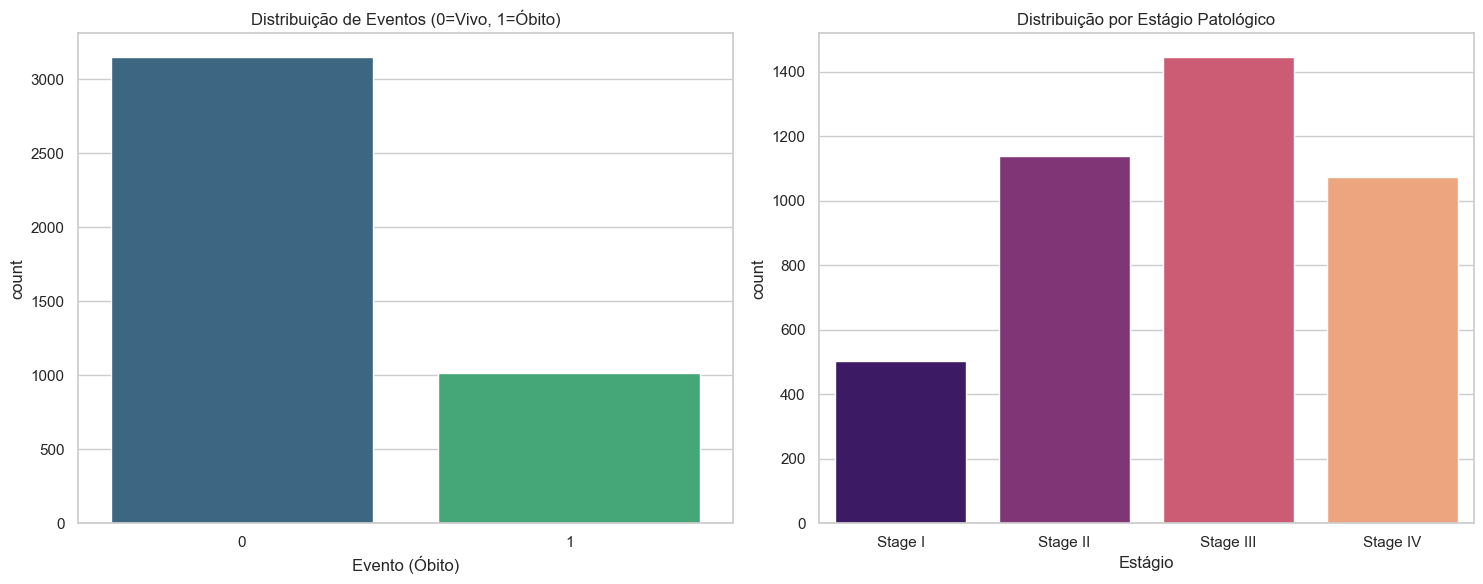

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de Eventos
sns.countplot(data=df_view, x='Evento (Óbito)', ax=axes[0], palette='viridis')
axes[0].set_title('Distribuição de Eventos (0=Vivo, 1=Óbito)')

# Gráfico de Estágios
sns.countplot(data=df_view, x='Estágio', ax=axes[1], palette='magma', order=sorted(df_view['Estágio'].unique()))
axes[1].set_title('Distribuição por Estágio Patológico')

plt.tight_layout()
plt.show()